<a href="https://colab.research.google.com/github/ginomempin/machine-learning-tutorials/blob/master/src/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch
!pip3 install scikit-learn

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn

# Outline

1. Use `sklearn` to create a linearly-separable dataset
1. Use `torch` to create a perceptron-based neural network
1. Train NN to fit the dataset to classify data into 2 classes

# Reference

[ginomempin / machine-learning-tutorials / docs / Perceptron.md](https://github.com/ginomempin/machine-learning-tutorials/blob/master/docs/Perceptron.md)

# Create the Data Set

In [0]:
# Define the number of data points
n_pts = 100

# Define 2 clusters (2 classes) and define the center for each.
# The exact position of the 2 centers are not that important, 
# but were chosen such that there is a reasonably small degree 
# of separation to allow for classification.
centers = [[-0.5, 0.5], [0.5, -0.5]]

# Create a random set of points centered around the 2 centers.
# The make_blobs() method returns an array of data points (X)
# and the label values for each point (y).
X, y = datasets.make_blobs(
    n_samples=n_pts,
    random_state=123,   # Provide a fixed seed for reproducible random values
    centers=centers,
    cluster_std=0.4,    # Standard deviation of data points from center
)

In [0]:
print(X)
print(X.shape)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [0]:
print(y)
print(y.shape)

[0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0]
(100,)


The data points centered around `[-0.5, 0.5]` will be labeled with `0`.  
The data points centered around `[0.5, -0.5]` will be labeled with `1`.

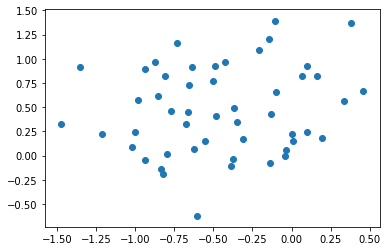

In [0]:
# Plot data points around 1st center (-0.5, 0.5)

# Using manual filtering
all_data0 = [pt for idx, pt in enumerate(X) if y[idx]==0]
all_data0_x = [pt[0] for pt in all_data0]
all_data0_y = [pt[1] for pt in all_data0]
plt.scatter(all_data0_x, all_data0_y)

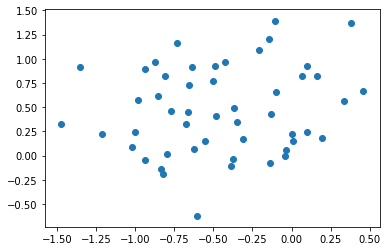

In [0]:
# Using numpy filter
plt.scatter(X[y==0, 0], X[y==0, 1])

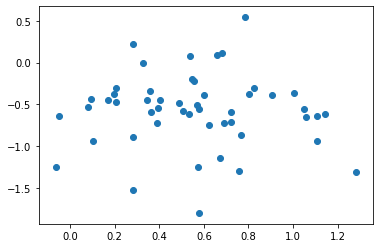

In [0]:
# Plot data points around 2nd center (0.5, -0.5)

# Using manual filtering
all_data1 = [pt for idx, pt in enumerate(X) if y[idx]==1]
all_data1_x = [pt[0] for pt in all_data1]
all_data1_y = [pt[1] for pt in all_data1]
plt.scatter(all_data1_x, all_data1_y)

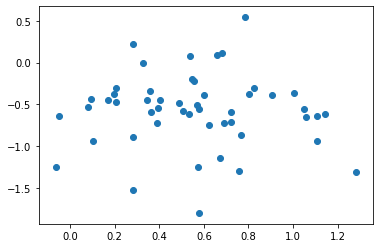

In [0]:
# Using numpy filter
plt.scatter(X[y==1, 0], X[y==1, 1])

In [0]:
# Wrap plotting the data into a function
def plot_data():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

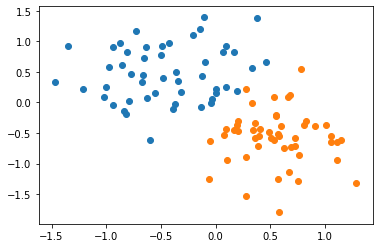

In [0]:
plot_data()

# Create the Perceptron Model

In [0]:
# 
#  x2 -- w1 --\
#              \
#  x1 -- w2 ----- sigmoid -- output
#              /
#  1  -- b1 --/
#

class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self._linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self._linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return "1, lower right"
        else:
            return "0, upper left"

In [0]:
# Set a fixed seed to get reproducible results with tutorial]
# In reality, use any seed.
torch.manual_seed(2)

model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


# Initial Results

## Get the Model's Initial Parameters

In [0]:
w, b = model.parameters()
print(w, b)

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True) Parameter containing:
tensor([0.1939], requires_grad=True)


In [0]:
# Get w1 and w2

# Change 'w' from 1x2 to 2x1 then unpack it
w1, w2 = w.view(2)
print(w1)
print(w2)

tensor(0.1622, grad_fn=<SelectBackward>)
tensor(-0.1683, grad_fn=<SelectBackward>)


In [0]:
# Get b

# Simply extrac the element from the array
b1 = b[0]
print(b1)

tensor(0.1939, grad_fn=<SelectBackward>)


In [0]:
print(w1.item(), w2.item(), b1.item())

0.16220331192016602 -0.1682732105255127 0.19390898942947388


In [0]:
# Wrap it into a function
def get_params():
    w, b = model.parameters()
    w1, w2 = w.view(2)
    b1 = b[0]
    return w1.item(), w2.item(), b1.item()

In [0]:
get_params()

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)

## Plot Initial Predictions

In [0]:
def plot_fit(title):
    # From Section 5: Perceptrons - Perceptron Model,
    # the equation for a line
    #   y = wx + b
    # can be rewritten as
    #   0 = wx - y + b
    #   0 = w1x + (-1)y + b
    #   0 = w1*x1 + w2*y + b
    #   0 = w1*x1 + w2*x2 + b
    # Arranging algebraically
    #  x2 = ((w1*x1)+b)/-w2

    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])  # range of x of the data set
    x2 = ((w1 * x1) + b1) / -w2

    plt.plot(x1, x2, 'r')
    plot_data()

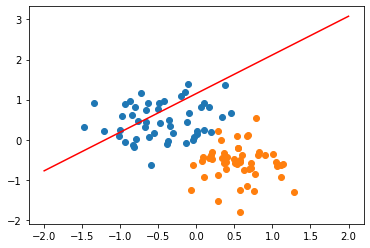

In [0]:
plot_fit("Initial")

# Training

## Convert Dataset to Tensors

In [0]:
x_data = torch.Tensor(X)
y_labels = torch.Tensor(y.reshape(100, 1))  # To satisfy Torch warning 
                                            # """
                                            #  UserWarning: Using a target size (torch.Size([100])) 
                                            #  that is different to the input size (torch.Size([100, 1]))
                                            # """

## Define the Loss and Optimizer Functions

In [0]:
# Use Cross Entropy to compute the loss.
# Specifically, Binary Cross Entropy Loss.
criterion = nn.BCELoss()

# Use Gradient Descent to optimize the model.
# Specifically, Stochastic Gradient Descent.
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01
)

## Forward-Backward for N epochs

In [0]:
# Set the number of passes, where on each pass,
# we will make a prediction, calculate the loss, 
# take the gradient(the derivative) of the loss, 
# then subtract the current gradient from the 
# current weight. This has to be done iteratively
# until the loss approaches zero.
epochs = 1000

losses = []
for i in range(epochs):
    y_pred = model.forward(torch.Tensor(x_data))

    loss = criterion(y_pred, torch.Tensor(y_labels))
    losses.append(loss)
    print("epoch {}: loss={}".format(i, loss.item()))
    
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

epoch 0: loss=0.6185115575790405
epoch 1: loss=0.6174639463424683
epoch 2: loss=0.6164201498031616
epoch 3: loss=0.6153794527053833
epoch 4: loss=0.614342451095581
epoch 5: loss=0.6133086681365967
epoch 6: loss=0.6122783422470093
epoch 7: loss=0.6112515330314636
epoch 8: loss=0.6102280616760254
epoch 9: loss=0.6092080473899841
epoch 10: loss=0.6081910729408264
epoch 11: loss=0.6071775555610657
epoch 12: loss=0.606167733669281
epoch 13: loss=0.6051608920097351
epoch 14: loss=0.604157567024231
epoch 15: loss=0.6031574606895447
epoch 16: loss=0.602160632610321
epoch 17: loss=0.6011670827865601
epoch 18: loss=0.6001767516136169
epoch 19: loss=0.599189817905426
epoch 20: loss=0.5982059240341187
epoch 21: loss=0.5972254276275635
epoch 22: loss=0.5962479114532471
epoch 23: loss=0.5952739119529724
epoch 24: loss=0.5943028926849365
epoch 25: loss=0.5933352112770081
epoch 26: loss=0.5923705101013184
epoch 27: loss=0.5914090275764465
epoch 28: loss=0.5904508829116821
epoch 29: loss=0.589495718479

## Plot the Loss 

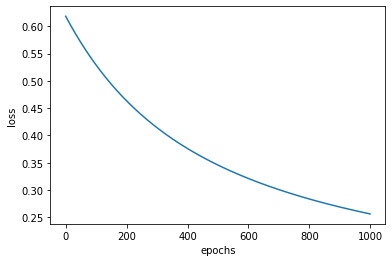

In [0]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(range(epochs), losses)

## Plot Trained Predictions

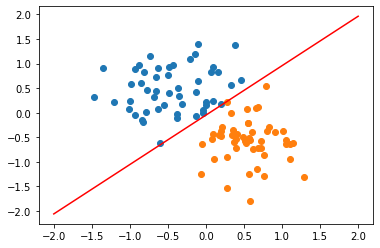

In [0]:
plot_fit("Trained")

# Testing

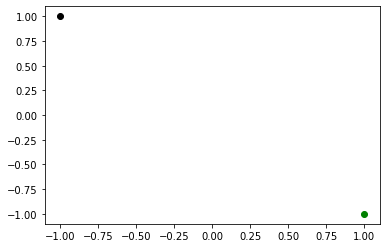

In [0]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])

point1_np = point1.numpy()
plt.plot(point1_np[0], point1_np[1], "go")

point2_np = point2.numpy()
plt.plot(point2_np[0], point2_np[1], "ko")

In [0]:
print("point1 probability to be in positive region = {}".format(model.forward(point1).item()))
print("point1 is in " + model.predict(point1))
# If it's closer to 1, it means it is most probably in the positive region.

point1 probability to be in positive region = 0.9424158334732056
point1 is in 1, lower right


In [0]:
print("point2 probability to be in negative region = {}".format(model.forward(point2).item()))
print("point2 is in " + model.predict(point2))
# If it's closer to 0, it means it is most probably in the negative region.

point2 probability to be in negative region = 0.05055497586727142
point2 is in 0, upper left


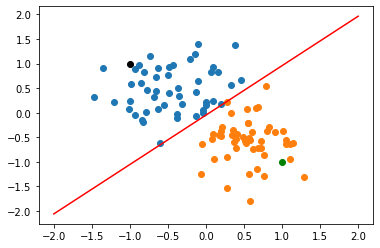

In [0]:
plt.plot(point1_np[0], point1_np[1], "go")
plt.plot(point2_np[0], point2_np[1], "ko")
plot_fit("Trained + New Data")